<a href="https://colab.research.google.com/github/tacinunesc/Geracao-tech-Unimed-BH/blob/main/Projeto_Aula2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com planilhas de excel


In [ ]:
import pandas as pd

In [ ]:
#importando planilhas
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo as 5 primeiras linhas
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#exibindo as ultimas 5 linhas
df1.tail()

,Cidade,Data,Vendas,LojaID,Qtde
125,Aracaju,2018-01-01,15.62,1522,2
126,Aracaju,2018-01-01,13.41,1520,7
127,Aracaju,2018-01-01,33.12,1522,9
128,Aracaju,2018-01-01,37.49,1521,2
129,Aracaju,2018-01-01,13.70,1522,6


In [ ]:
#tipo de dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
4,Fortaleza,2019-01-01,14.25,1004,6
133,Natal,2019-01-02,153.71,1035,1
42,Fortaleza,2019-01-01,38.71,1004,5
30,Fortaleza,2019-01-01,39.13,1005,6
146,Salvador,2019-01-02,149.88,1037,1


In [ ]:
#alterando o tipo de dado
df['LojaID'] = df['LojaID'].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


# Tratando valores faltantess

In [ ]:
#consultando numero faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#substituindo valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#media de vendas
df['Vendas'].mean()

122.61180089485458

In [ ]:
#subtituindo valores nulos por zero
df['Vendas'].fillna(0, inplace = True)

In [ ]:
#apagando as linhas com valores nulos
df.dropna(inplace = True)

In [ ]:
#removendo linhas que estejam com valores faltantes
df.dropna(how="all", inplace = True)

# Criando colunas novas

In [ ]:
#criando colunas de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df["Receita/Vendas"] = df["Receita"]/df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest as tres maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsamllest as 3 piores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending = False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
25,Fortaleza,2019-01-01,80.31,1004,4,321.24,4.0,2019
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.0,2019
161,Salvador,2019-01-02,5.80,1036,1,5.80,1.0,2019
61,Natal,2018-09-11,724.00,853,2,1448.00,2.0,2018
203,Natal,2019-01-02,37.75,1035,2,75.50,2.0,2019


In [ ]:
#Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
75,Fortaleza,2019-01-01,19.99,1005,4,79.96,4.0,2019,1,1
57,Salvador,2019-01-01,11.72,1035,1,11.72,1.0,2019,1,1
179,Salvador,2019-01-02,64.95,1036,1,64.95,1.0,2019,1,2
11,Salvador,2019-01-01,30.62,1034,3,91.86,3.0,2019,1,1
55,Natal,2019-01-08,859.00,854,4,3436.00,4.0,2019,1,8


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1,365 days
85,Natal,2019-01-02,16.88,1035,3,50.64,3.0,2019,1,2,366 days
102,Recife,2019-01-01,96.50,982,7,675.50,7.0,2019,1,1,365 days
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days
9,Natal,2018-05-02,261.00,852,3,783.00,3.0,2018,5,2,121 days


In [ ]:
#Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
62,Salvador,2019-01-01,161.02,1037,3,483.06,3.0,2019,1,1,365 days,1
167,Natal,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2,366 days,1
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019,1,2,366 days,1
203,Salvador,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2,366 days,1


In [ ]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

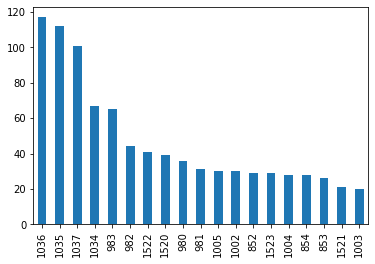

In [ ]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

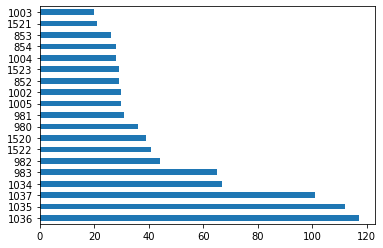

In [ ]:
#Grafico de barras horizontais
df["LojaID"].value_counts().plot.barh()

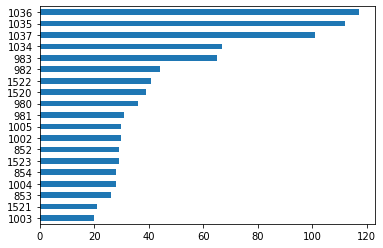

In [ ]:
#Grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

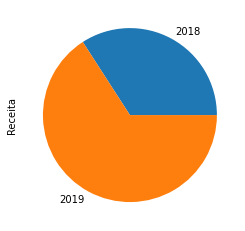

In [ ]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

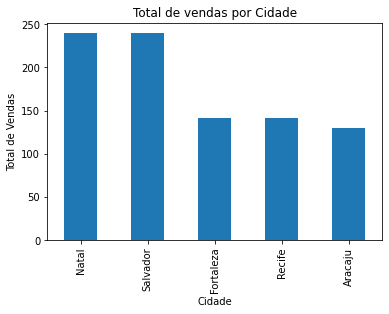

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

Text(0, 0.5, 'Total de venda')

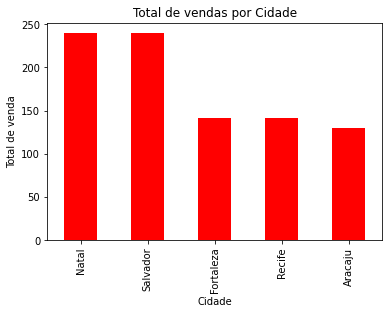

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de venda")

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

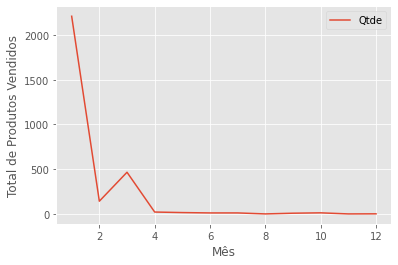

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

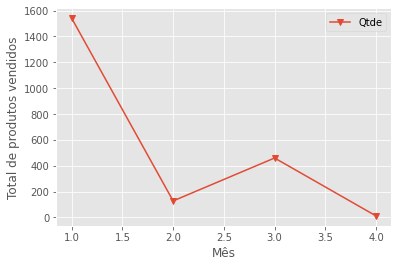

In [ ]:
#Total de produtos vendidos por mes
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();


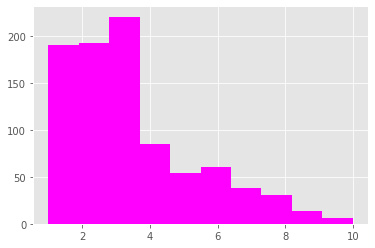

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="magenta");

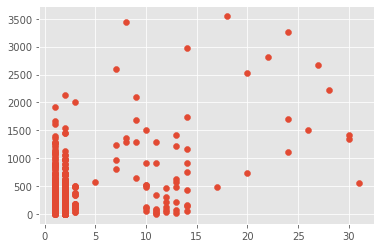

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019["Receita"]);

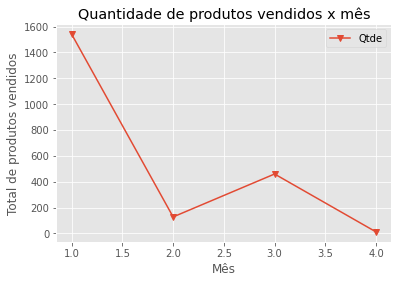

In [ ]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker ="v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")